In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## data augmentation ,here we use the same data to generate the different orientations,different instances of the same data so we don't have to train the data seperately;cnn expects 4 dimensions,so we add the extra dummy dimension;validation data is always taken from the x train ,not from the x test;it decides when the training should be stopped;upto 50000 the data is given to x train , after 50k the data is given to x test;

## parameters in augmentation;
## convolution layer ; 32 ;(28,28,1) means grayscale image;



In [2]:
model=keras.Sequential(
[
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,3)),
    layers.Flatten(),
    layers.Dense(10,activation="softmax")
])

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#scale the images to the [0,1] range
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

#add a channel dimnesion to the images
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

#split the training set into training and validation sets
x_train,x_val=x_train[:50000],x_train[50000:]
y_train,y_val=y_train[:50000],y_train[50000:]

In [4]:
datagen=ImageDataGenerator(
         rotation_range=10,
         zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
)

In [5]:
#without data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

#with data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2617 - accuracy: 0.9245 - val_loss: 0.1143 - val_accuracy: 0.9683
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0908 - accuracy: 0.9739 - val_loss: 0.0763 - val_accuracy: 0.9800
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0671 - accuracy: 0.9801 - val_loss: 0.0750 - val_accuracy: 0.9774
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0638 - val_accuracy: 0.9822
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.0614 - val_accuracy: 0.9825
Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3001 - accuracy: 0.9074 - val_loss: 0.0969 - val_accuracy: 0.9708
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2108 - accuracy: 0.9358 - val_loss: 0.1191 - val_accurac

In [6]:
#without data augmentation
model.evaluate(x_test,y_test)

#with data augmentation
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1084 - accuracy: 0.9660


[0.10840226709842682, 0.9660000205039978]

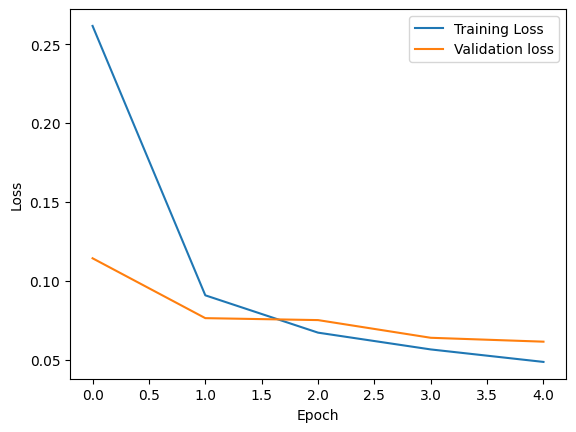

In [7]:
import matplotlib.pyplot as plt
#plot the training and validation loss
plt.plot(history1.history['loss'],label='Training Loss')
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

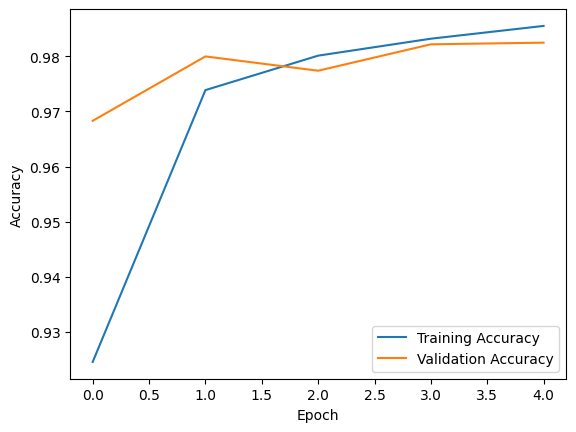

In [8]:
#plot the training and validation accuracy
plt.plot(history1.history['accuracy'],label='Training Accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()